<a href="https://colab.research.google.com/github/vigneshramesh1/group32-capstone/blob/joseph_data_exploration/5G_NIDD_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5G-NIDD Exploratory Data Analysis**

## Introduction

In [ ]:
# 5G-NIDD Dataset
# A COMPREHENSIVE NETWORK INTRUSION DETECTION DATASET GENERATED OVER 5G WIRELESS NETWORK

# Dataset Source:
# https://ieee-dataport.org/documents/5g-nidd-comprehensive-network-intrusion-detection-dataset-generated-over-5g-wireless

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
PATH = '/content/drive/MyDrive/SER 517/Dataset/'
Combined = pd.read_csv(PATH + 'Combined.csv')

<ipython-input-4-62a975a32fef>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  Combined = pd.read_csv(PATH + 'Combined.csv')


In [ ]:
Combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 52 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1215890 non-null  int64  
 1   Seq          1215890 non-null  int64  
 2   Dur          1215890 non-null  float64
 3   RunTime      1215890 non-null  float64
 4   Mean         1215890 non-null  float64
 5   Sum          1215890 non-null  float64
 6   Min          1215890 non-null  float64
 7   Max          1215890 non-null  float64
 8   Proto        1215890 non-null  object 
 9   sTos         1215676 non-null  float64
 10  dTos         272823 non-null   float64
 11  sDSb         1215676 non-null  object 
 12  dDSb         272823 non-null   object 
 13  sTtl         1215676 non-null  float64
 14  dTtl         272823 non-null   float64
 15  sHops        1215676 non-null  float64
 16  dHops        272823 non-null   float64
 17  Cause        1215890 non-null  object 
 18  To

In [ ]:
Combined_Benign = Combined[Combined['Label'] == 'Benign']
Combined_Malicious = Combined[Combined['Label'] == 'Malicious']
Combined_ICMPFlood = Combined[Combined['Attack Type'] == 'ICMPFlood']
Combined_HTTPFlood = Combined[Combined['Attack Type'] == 'HTTPFlood']
Combined_SlowrateDoS = Combined[Combined['Attack Type'] == 'SlowrateDoS']
Combined_SYNFlood = Combined[Combined['Attack Type'] == 'SYNFlood']
Combined_SYNScan = Combined[Combined['Attack Type'] == 'SYNScan']
Combined_TCPConnectScan = Combined[Combined['Attack Type'] == 'TCPConnectScan']
Combined_UDPFlood = Combined[Combined['Attack Type'] == 'UDPFlood']
Combined_UDPScan = Combined[Combined['Attack Type'] == 'UDPScan']

print('Total Records: ',len(Combined))
print('Total Benign: ',len(Combined_Benign))
print('Total Malicious: ',len(Combined_Malicious))
print('Total ICMPFlood: ',len(Combined_ICMPFlood))
print('Total HTTPFlood: ',len(Combined_HTTPFlood))
print('Total SlowrateDos: ',len(Combined_SlowrateDoS))
print('Total SYNFlood: ',len(Combined_SYNFlood))
print('Total SYNScan: ',len(Combined_SYNScan))
print('Total TCPConnectScan: ',len(Combined_TCPConnectScan))
print('Total UDPFlood: ',len(Combined_UDPFlood))
print('Total UDPScan: ',len(Combined_UDPScan))

print('Benign Percentage in Total Traffic: ',(len(Combined_Benign)/len(Combined)*100))
print('Malicious Percentage in Total Traffic: ',(len(Combined_Malicious)/len(Combined)*100))
print('ICMPFlood Percentage in Malicious Traffic: ',(len(Combined_ICMPFlood)/len(Combined_Malicious)*100))
print('HTTPFlood Percentage in Malicious Traffic: ',(len(Combined_HTTPFlood)/len(Combined_Malicious)*100))
print('SlowrateDos Percentage in Malicious Traffic: ',(len(Combined_SlowrateDoS)/len(Combined_Malicious)*100))
print('SYNFlood Percentage in Malicious Traffic: ',(len(Combined_SYNFlood)/len(Combined_Malicious)*100))
print('SYNScan Percentage in Malicious Traffic: ',(len(Combined_SYNScan)/len(Combined_Malicious)*100))
print('TCPConnectScan Percentage in Malicious Traffic: ',(len(Combined_TCPConnectScan)/len(Combined_Malicious)*100))
print('UDPFlood Percentage in Malicious Traffic: ',(len(Combined_UDPFlood)/len(Combined_Malicious)*100))
print('UDPScan Percentage in Malicious Traffic: ',(len(Combined_UDPScan)/len(Combined_Malicious)*100))

Total Records:  1215890
Total Benign:  477737
Total Malicious:  738153
Total ICMPFlood:  1155
Total HTTPFlood:  140812
Total SlowrateDos:  73124
Total SYNFlood:  9721
Total SYNScan:  20043
Total TCPConnectScan:  20052
Total UDPFlood:  457340
Total UDPScan:  15906
Benign Percentage in Total Traffic:  39.29113653373249
Malicious Percentage in Total Traffic:  60.7088634662675
ICMPFlood Percentage in Malicious Traffic:  0.15647162580115503
HTTPFlood Percentage in Malicious Traffic:  19.07626196736991
SlowrateDos Percentage in Malicious Traffic:  9.906347329076763
SYNFlood Percentage in Malicious Traffic:  1.3169356488424486
SYNScan Percentage in Malicious Traffic:  2.7152907324091347
TCPConnectScan Percentage in Malicious Traffic:  2.7165099918309616
UDPFlood Percentage in Malicious Traffic:  61.95734488649373
UDPScan Percentage in Malicious Traffic:  2.1548378181759067


In [ ]:
# Counts for benign and malicious
total_benign = len(Combined[Combined['Label'] == 'Benign'])
total_malicious = len(Combined[Combined['Label'] == 'Malicious'])

# Counts for each attack type
attack_types = Combined['Attack Type'].unique()
attack_counts = {attack: len(Combined[Combined['Attack Type'] == attack]) for attack in attack_types}

## **Data Visulaization**

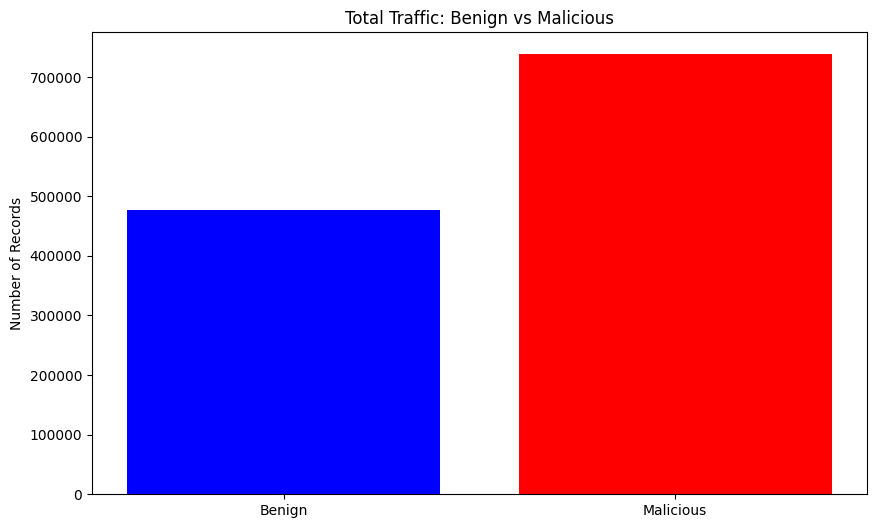

In [ ]:
# Creating the bar chart for Benign vs Malicious
plt.figure(figsize=(10, 6))
plt.bar(['Benign', 'Malicious'], [total_benign, total_malicious], color=['blue', 'red'])
plt.title('Total Traffic: Benign vs Malicious')
plt.ylabel('Number of Records')
plt.show()

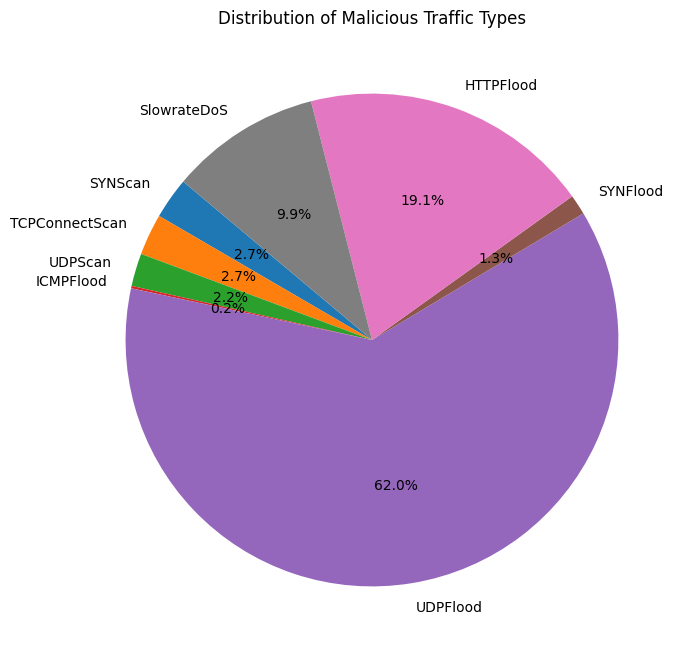

In [ ]:
# Creating the pie chart for Distribution of Malicious Traffic Types
# Filtering out benign entries and ensuring only malicious types are included
malicious_traffic = Combined[Combined['Label'] == 'Malicious']
malicious_attack_types = malicious_traffic['Attack Type'].unique()
malicious_attack_counts = [len(malicious_traffic[malicious_traffic['Attack Type'] == attack]) for attack in malicious_attack_types]

plt.figure(figsize=(10, 8))
plt.pie(malicious_attack_counts, labels=malicious_attack_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Malicious Traffic Types')
plt.show()

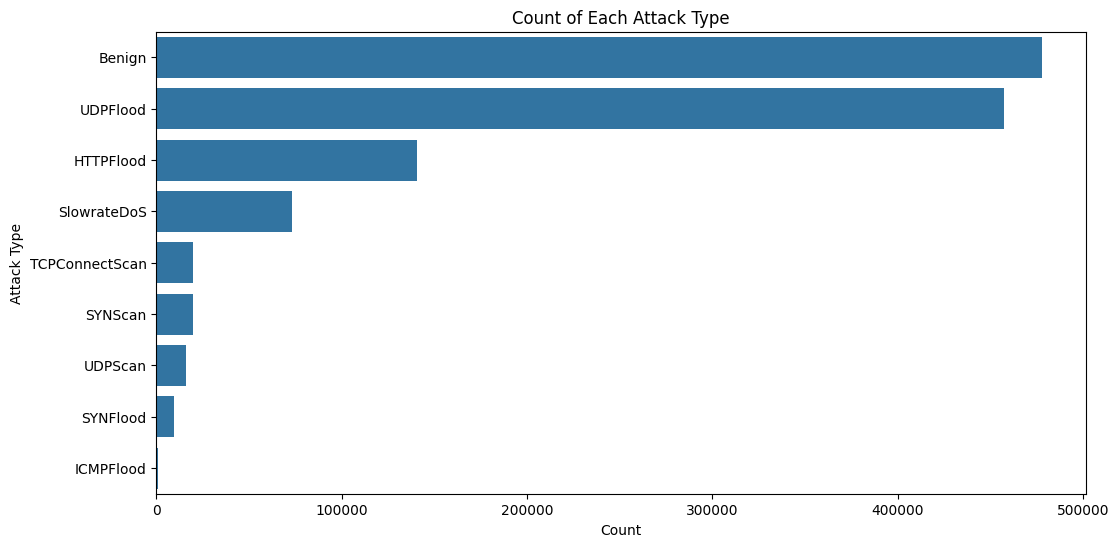

In [ ]:
# Count Plots for Categorical Data
# Count plots can help visualize the distribution of categorical data, showing the count of observations for each category.

# Count plot for Attack Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Attack Type', data=Combined, order = Combined['Attack Type'].value_counts().index)
plt.title('Count of Each Attack Type')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

## **Analyzing Null Values**

In [ ]:
# columns with null values

columns_null = []
columns = Combined.columns
for column in columns:
    c = Combined[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

sTos has 214 null values
dTos has 943067 null values
sDSb has 214 null values
dDSb has 943067 null values
sTtl has 214 null values
dTtl has 943067 null values
sHops has 214 null values
dHops has 943067 null values
SrcGap has 937219 null values
DstGap has 937219 null values
SrcWin has 973470 null values
DstWin has 1038812 null values
sVid has 1101319 null values
dVid has 1213881 null values
SrcTCPBase has 937219 null values
DstTCPBase has 985843 null values


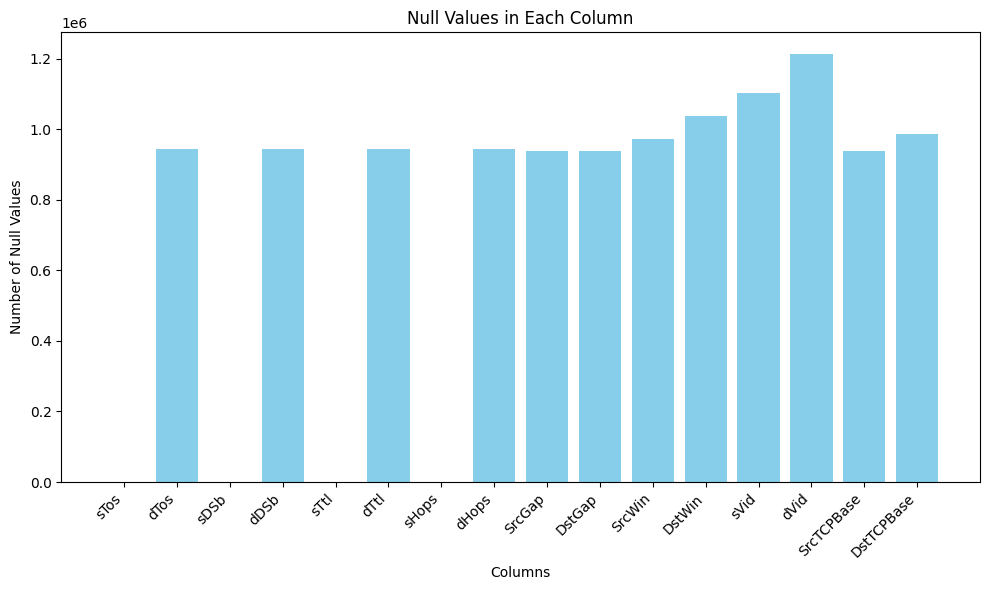

In [ ]:
columns_null = {}
columns = Combined.columns
for column in columns:
    c = Combined[column].isnull().sum()
    if c != 0:
        columns_null[column] = c

# Now, plotting the null values per column
plt.figure(figsize=(10, 6))
plt.bar(columns_null.keys(), columns_null.values(), color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha="right")
plt.title('Null Values in Each Column')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
